Wide and deep learning
===

* *30 min* | Última modificación: Julio 12, 2019.

## Depedencias

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
import tensorflow as tf
## Establece el nivel de reporte en 
## pantalla de TensorFlow
tf.logging.set_verbosity(tf.logging.ERROR)

## Dataset

In [8]:
##
## datos del problema propuesto
##
from sklearn.datasets import make_regression

X, d = make_regression(
    n_samples=100,         #
    n_features=2,          #
    n_informative=1,       #
    bias=0.0,              # intercepto
    effective_rank=None,   # numero de vectores singulares para explicar los datos
    tail_strength=0.9,     # ? importancia relativa de las colas
    noise=12.0,            #
    shuffle=False,         # ?
    coef=False,            # ?coeficientes de la regresion
    random_state=12136)    #

d += 0.05 * X[:,0] ** 2
d += 0.07 * X[:,1] ** 2
d += 0.81 * X[:,0] * X[:,1]

print('X:')
print(X[0:5,:])
print('')
print('d:')
print(d[0:5])

X:
[[-0.07548221  0.25457976]
 [-1.67790459  0.02934494]
 [-1.26015485 -1.17999447]
 [ 1.26116815 -0.44973402]
 [ 0.44115888  0.3959695 ]]

d:
[ 15.57728739 -12.90315327   5.52585089  19.93503306  16.26098572]


## Funciones de entrada a los estimadores

In [20]:
## Indica que las columnas 'x' son numéricas
column_x0 = tf.feature_column.numeric_column("x0")
column_x1 = tf.feature_column.numeric_column("x1")

## Función de entrada para el estimador.
## Debe retornar una tupla con (entradas, salida).
## Note que features es un diccionario que contine 
## una paraja clave-valor por cada variable 
## independiente
def input_fn_train():
    features={
        'x0': X[:,0],
        'x1': X[:,1]}
    labels=d
    return features, labels


## Esta función es igual que la anterior, pero 
## retorna únicamente el data.frame de variables
## independientes
def input_fn_predict():
    features={
        'x0': X[:,0],
        'x1': X[:,1]}
    return features

## Baseline regressor

Pronosticos:
  -0.0755    1.6371
  -1.6779    1.6371
  -1.2602    1.6371
   1.2612    1.6371
   0.4412    1.6371
  -0.0354    1.6371
   0.5158    1.6371
   0.1691    1.6371
  -0.3039    1.6371
   0.2303    1.6371
  -1.5080    1.6371
  -1.4532    1.6371
   0.4854    1.6371
   1.1130    1.6371
  -0.2514    1.6371
  -0.3076    1.6371
   0.5264    1.6371
  -0.6606    1.6371
  -1.4774    1.6371
   0.9704    1.6371
   0.8731    1.6371
  -0.1800    1.6371
  -0.7563    1.6371
   0.1899    1.6371
   0.2248    1.6371
   0.5047    1.6371
  -0.1888    1.6371
  -1.1621    1.6371
  -0.3132    1.6371
   0.6452    1.6371
  -0.8411    1.6371
   1.4799    1.6371
   1.6152    1.6371
  -0.1960    1.6371
   0.6913    1.6371
   0.6560    1.6371
   1.0014    1.6371
   0.5624    1.6371
   1.0148    1.6371
  -0.0292    1.6371
   1.1079    1.6371
  -1.2908    1.6371
  -0.2243    1.6371
   0.9131    1.6371
   0.3312    1.6371
  -1.1015    1.6371
   1.3994    1.6371
  -0.8867    1.6371
   1.5016    1.6371
   0.17

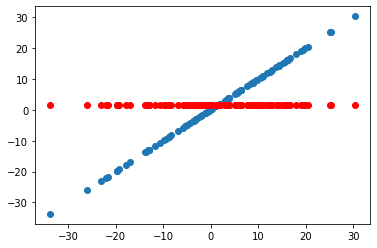

In [18]:
## Construye el estimador base, cuya salida es
## una constante.
regressor = tf.estimator.BaselineRegressor()

## Entrenamiento
regressor.train(
    input_fn=input_fn_train,  # función de entrada
    steps=100)                # número de iteraciones (optimización)

## Pronostica para nuevos valores. En este
## caso se usa la misma función de entrada que
## para el entrenamiento.
results = regressor.predict(
    input_fn=input_fn_predict)

## Imprime los resultados.
forecasts = []
print('Pronosticos:')
for i, value in zip(X, results):
    ## Value es un diccionario por cada posible valor de x.
    ## El contenido de la clave predictions es un vector.
    print('  {:7.4f}   {:7.4f}'.format(i[0], value['predictions'][0]))
    
    ## Se almacenan los valores pronosticodos en una lista
    ## para poder graficarlos 
    forecasts += value['predictions'].tolist()

## Grafica los puntos de la muestra de datos
plt.plot(d, d, 'o')

## Grafica los pronósticos del modelo
plt.plot(d, forecasts, 'o', color = 'red');

## Imprime los estadísticos de error.
metrics = regressor.evaluate(input_fn=input_fn_train, steps=1)
print('')
print('Métricas de error')
for key in sorted(metrics.keys()):
    print("  {:16s}: {:10.4f}".format(key, metrics[key]))
print('')

## Linear Regressor

Pronosticos:
  -0.0755    0.6885
  -1.6779   -6.5234
  -1.2602   -3.2336
   1.2612    7.6961
   0.4412    2.9372
  -0.0354   -1.3694
   0.5158    1.9200
   0.1691    2.1240
  -0.3039    1.1970
   0.2303    3.8083
  -1.5080   -4.6594
  -1.4532   -6.0978
   0.4854    2.6390
   1.1130    8.4403
  -0.2514    1.3201
  -0.3076   -0.5240
   0.5264    5.2608
  -0.6606   -1.0702
  -1.4774   -6.8697
   0.9704    7.5170
   0.8731    5.4933
  -0.1800   -1.8034
  -0.7563   -3.1867
   0.1899    2.5804
   0.2248    1.8732
   0.5047    4.3666
  -0.1888    0.1824
  -1.1621   -3.4233
  -0.3132   -1.3858
   0.6452    4.8510
  -0.8411   -0.6253
   1.4799    8.4954
   1.6152   10.7784
  -0.1960    0.8604
   0.6913    5.3250
   0.6560    5.7215
   1.0014    8.2076
   0.5624    2.4769
   1.0148    5.6354
  -0.0292    0.7079
   1.1079    5.9631
  -1.2908   -4.1310
  -0.2243    1.5290
   0.9131    5.8509
   0.3312    4.2134
  -1.1015   -4.4079
   1.3994    8.6723
  -0.8867   -1.4153
   1.5016    7.7460
   0.17

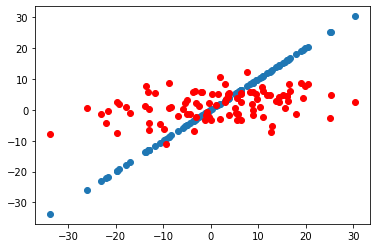

In [22]:
## Construye el estimador lineal, cuya salida es
## el resultado de la regresión lineal entre
## x y y.
regressor = tf.estimator.LinearRegressor(
    feature_columns = [column_x0, column_x1],
    optimizer = tf.train.AdamOptimizer(
        learning_rate = 0.2))

## Entrenamiento
regressor.train(
    input_fn=input_fn_train,
    steps=1000)

## Pronostica para nuevos valores. En este
## caso se usa la misma función de entrada que
## para el entrenamiento.
results = regressor.predict(
    input_fn=input_fn_predict)

## Imprime los resultados.
forecasts = []
print('Pronosticos:')
for i, value in zip(X, results):
    ## Value es un diccionario por cada posible valor de x.
    ## El contenido de la clave predictions es un vector.
    print('  {:7.4f}   {:7.4f}'.format(i[0], value['predictions'][0]))
    
    ## Se almacenan los valores pronosticodos en una lista
    ## para poder graficarlos 
    forecasts += value['predictions'].tolist()

## Grafica los puntos de la muestra de datos
plt.plot(d, d, 'o')

## Grafica los pronósticos del modelo
plt.plot(d, forecasts, 'o', color = 'red');

## Imprime los estadísticos de error.
metrics = regressor.evaluate(input_fn=input_fn_train, steps=1)
print('')
print('Métricas de error')
for key in sorted(metrics.keys()):
    print("  {:16s}: {:10.4f}".format(key, metrics[key]))
print('')

## Wide and deep

![assets/wide-and-deep.png](assets/wide-and-deep.png)

Fuente: https://ai.googleblog.com/2016/06/wide-deep-learning-better-together-with.html

Pronosticos:
  -0.0755   15.4928
  -1.6779   -12.1992
  -1.2602    1.4107
   1.2612   19.9385
   0.4412   15.8983
  -0.0354    4.2207
   0.5158    7.3275
   0.1691   -1.3240
  -0.3039   -14.5015
   0.2303   17.3951
  -1.5080   -11.2162
  -1.4532   -11.6763
   0.4854    1.8158
   1.1130   20.0774
  -0.2514   -3.2609
  -0.3076   -10.8196
   0.5264    3.1477
  -0.6606   -7.9798
  -1.4774   -3.6884
   0.9704   10.3450
   0.8731   -12.0863
  -0.1800    7.2235
  -0.7563    9.7235
   0.1899    5.3091
   0.2248   -19.6286
   0.5047   13.9041
  -0.1888   -5.0729
  -1.1621   -1.2178
  -0.3132   -6.4407
   0.6452   12.0191
  -0.8411   -1.6420
   1.4799   16.8351
   1.6152    1.8277
  -0.1960   -0.2066
   0.6913    5.6117
   0.6560   -2.4343
   1.0014    3.6272
   0.5624   12.6134
   1.0148   -3.5090
  -0.0292    4.4261
   1.1079    9.1347
  -1.2908   -12.2621
  -0.2243   -3.5757
   0.9131    8.4496
   0.3312   12.7081
  -1.1015   -21.6983
   1.3994   -7.7418
  -0.8867   -18.2874
   1.5016   -15.1

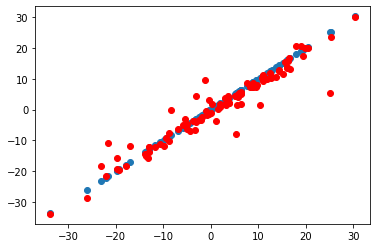

In [27]:
## Construye el estimador lineal, cuya salida es
## el resultado de la regresión lineal entre
## x y y.
regressor = tf.estimator.DNNLinearCombinedRegressor(
    linear_feature_columns = [column_x0, column_x1],
    linear_optimizer = tf.train.AdamOptimizer(
        learning_rate = 0.2),
    dnn_feature_columns=[column_x0, column_x1],
    dnn_hidden_units=[50, 20],
    dnn_optimizer = tf.train.AdamOptimizer(
        learning_rate = 0.2))

## Entrenamiento
regressor.train(
    input_fn=input_fn_train,
    steps=10000)

## Pronostica para nuevos valores. En este
## caso se usa la misma función de entrada que
## para el entrenamiento.
results = regressor.predict(
    input_fn=input_fn_predict)

## Imprime los resultados.
forecasts = []
print('Pronosticos:')
for i, value in zip(X, results):
    ## Value es un diccionario por cada posible valor de x.
    ## El contenido de la clave predictions es un vector.
    print('  {:7.4f}   {:7.4f}'.format(i[0], value['predictions'][0]))
    
    ## Se almacenan los valores pronosticodos en una lista
    ## para poder graficarlos 
    forecasts += value['predictions'].tolist()

## Grafica los puntos de la muestra de datos
plt.plot(d, d, 'o')

## Grafica los pronósticos del modelo
plt.plot(d, forecasts, 'o', color = 'red');

## Imprime los estadísticos de error.
metrics = regressor.evaluate(input_fn=input_fn_train, steps=1)
print('')
print('Métricas de error')
for key in sorted(metrics.keys()):
    print("  {:16s}: {:10.4f}".format(key, metrics[key]))
print('')